# First Dataset

In [1]:
import pandas as pd
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

#turn my dictionary into a DataFrame
data_dict= {}
for i in dataset : 
    
    for j in  i:
       
        if j in data_dict :
            data_dict[j] +=1
        else :
            data_dict[j] = 1
print (data_dict)       
df = pd.DataFrame([data_dict])
df

{'Skirt': 4, 'Sneakers': 2, 'Scarf': 4, 'Pants': 4, 'Hat': 4, 'Sunglasses': 1, 'Dress': 2, 'Sandals': 1, 'Heels': 2, 'Necklace': 1, 'Earrings': 2, 'Shirt': 1}


,Skirt,Sneakers,Scarf,Pants,Hat,Sunglasses,Dress,Sandals,Heels,Necklace,Earrings,Shirt
0,4,2,4,4,4,1,2,1,2,1,2,1


## Visualisation first Dataset

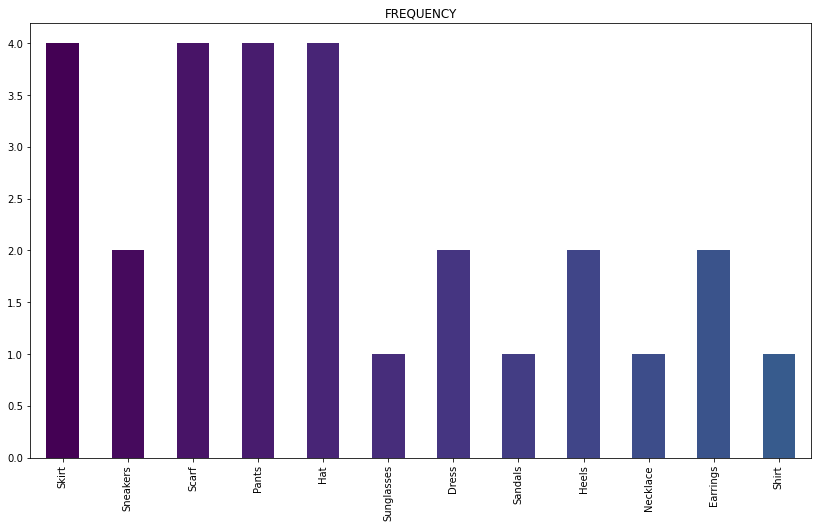

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
df_pt = df.sum()
df_pt
plt.figure(figsize=(14,8))
plt.title("FREQUENCY")
color = plt.cm.viridis(np.linspace(0, 1, 40))
df_pt.plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.show()

## Appriori Algo

In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 
#Transaction Encoder creates a Numpy array from a List and “One hot” encodes it but in a True/False format and not in 1s and 0s
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df1 = pd.DataFrame(te_ary, columns=te.columns_)
df1

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


## Support Code

In [4]:
frequent_itemsets_df_1 = apriori(df1, min_support=0.6, use_colnames=True)
frequent_itemsets_df_1

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Pants, Skirt)"


## Confidence Code

In [5]:
association_rules(frequent_itemsets_df_1, metric="confidence", min_threshold=0.7)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


## Lift Code

In [6]:
association_rules(frequent_itemsets_df_1, metric="lift", min_threshold=1.25)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


# Second Dataset

In [7]:
import csv
f= open (r"C:\Users\Administrateur\Desktop\GMC\Cheickpoint 9/Market_Basket_Optimisation.csv")
myReader = csv.reader(f)

data_dicte = {}
for x in  myReader: 
    for y in  x:
        if y.lower() in data_dicte :
            data_dicte[y] +=1
        else :
            data_dicte[y] = 1
df2 = pd.DataFrame([data_dicte])
df2 

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins
0,536,153,250,193,68,70,86,239,200,228,...,90,36,65,33,14,44,33,1,7,5


## Visualisation second Dataset

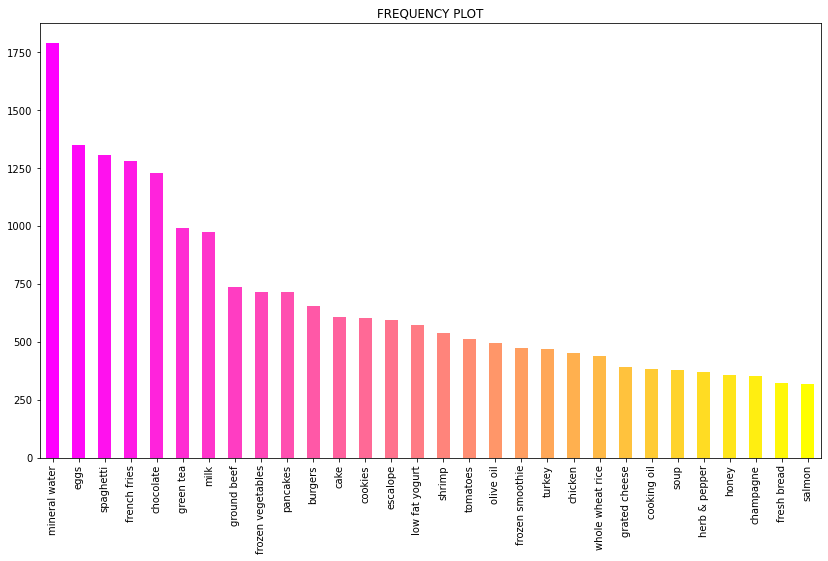

In [8]:
df_sum_2 = df2.sum().sort_values(ascending=False)
plt.figure(figsize=(14,8))
plt.title("FREQUENCY PLOT")
cnt = 30 # plot only first 'cnt' values
color = plt.cm.spring(np.linspace(0, 1, cnt))
df_sum_2.head(cnt).plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.grid(False)
plt.axis('on')
plt.show()


## Appriori Algo

In [9]:
import csv
f= open (r"C:\Users\Administrateur\Desktop\GMC\Cheickpoint 9/Market_Basket_Optimisation.csv")
myReader = csv.reader(f)
row2= [row for row in myReader]
#Transaction Encoder creates a Numpy array from a List and “One hot” encodes it but in a True/False format and not in 1s and 0s
te = TransactionEncoder()
te_arry = te.fit(row2).transform(row2)
df_2 = pd.DataFrame(te_arry, columns=te.columns_)
df_2

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Support Code

In [10]:
frequent_itemsets_df_2 = apriori(df_2, min_support=0.01, use_colnames=True)
frequent_itemsets_df_2

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, mineral water, milk)"
253,0.017064,"(spaghetti, ground beef, mineral water)"
254,0.015731,"(spaghetti, mineral water, milk)"
255,0.010265,"(olive oil, spaghetti, mineral water)"


## Confidence Code

In [14]:
association_rules(frequent_itemsets_df_2, metric="confidence", min_threshold=0.4)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
1,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962
2,(salmon),(mineral water),0.042528,0.238368,0.017064,0.401254,1.683336,0.006927,1.272045
3,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
4,"(chocolate, eggs)",(mineral water),0.033196,0.238368,0.013465,0.405622,1.701663,0.005552,1.281394
5,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
6,"(chocolate, milk)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656
7,"(chocolate, spaghetti)",(mineral water),0.039195,0.238368,0.015865,0.404762,1.698053,0.006522,1.279541
8,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
9,"(eggs, milk)",(mineral water),0.030796,0.238368,0.013065,0.424242,1.779778,0.005724,1.322834


## Lift Code

In [12]:
association_rules(frequent_itemsets_df_2, metric="lift", min_threshold=1.25)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113
2,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080
3,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198
4,(eggs),(burgers),0.179709,0.087188,0.028796,0.160237,1.837830,0.013128,1.086988
...,...,...,...,...,...,...,...,...,...
329,"(spaghetti, mineral water)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,0.005788,1.119933
330,"(pancakes, mineral water)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198
331,(spaghetti),"(pancakes, mineral water)",0.174110,0.033729,0.011465,0.065850,1.952333,0.005593,1.034385
332,(pancakes),"(spaghetti, mineral water)",0.095054,0.059725,0.011465,0.120617,2.019529,0.005788,1.069244


#### 